<a href="https://colab.research.google.com/github/Shashank1202/Kaggle_playground/blob/main/kaggle21_Multi_Class_Prediction_of_Cirrhosia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle competitions download -c playground-series-s3e26

  0% 0.00/350k [00:00<?, ?B/s]
100% 350k/350k [00:00<00:00, 106MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/playground-series-s3e26.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
train=pd.read_csv('/content/train.csv')
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [67]:
test=pd.read_csv('/content/test.csv')
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [31]:
train.shape

(7905, 20)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [33]:
train.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [34]:
train=train.replace('?',np.nan)

In [35]:
train.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

Text(0.5, 1.0, 'Status count plot')

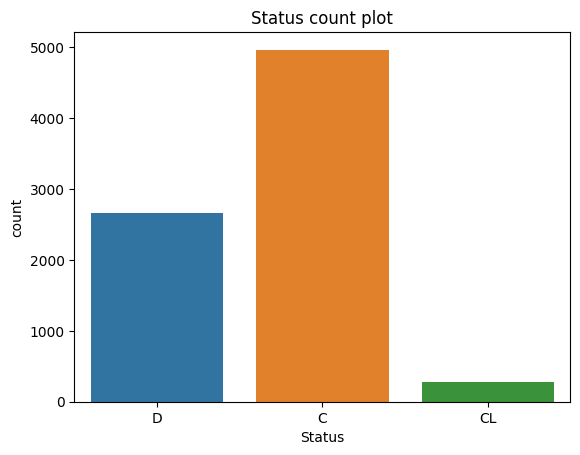

In [36]:
sns.countplot(x='Status', data=train)
plt.title("Status count plot")

In [60]:
for col in train.columns:
  value_counts=train[col].value_counts()
  print(f"Columns '{col}': \n {value_counts}\n")

Columns 'id': 
 0       1
5280    1
5278    1
5277    1
5276    1
       ..
2631    1
2630    1
2629    1
2628    1
7904    1
Name: id, Length: 7905, dtype: int64

Columns 'N_Days': 
 1216    117
1434    105
769      83
3445     73
1765     64
       ... 
1870      1
2523      1
1214      1
3492      1
214       1
Name: N_Days, Length: 461, dtype: int64

Columns 'Drug': 
 Placebo            4010
D-penicillamine    3895
Name: Drug, dtype: int64

Columns 'Age': 
 22369    79
22388    71
20684    71
19060    70
16279    66
         ..
16939     1
13728     1
23111     1
13170     1
18628     1
Name: Age, Length: 391, dtype: int64

Columns 'Sex': 
 F    7336
M     569
Name: Sex, dtype: int64

Columns 'Ascites': 
 N    7525
Y     380
Name: Ascites, dtype: int64

Columns 'Hepatomegaly': 
 Y    4042
N    3863
Name: Hepatomegaly, dtype: int64

Columns 'Spiders': 
 N    5966
Y    1939
Name: Spiders, dtype: int64

Columns 'Edema': 
 N    7161
S     399
Y     345
Name: Edema, dtype: int64

Column

In [61]:
train.head(1)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.8,63.0,394.0,9.7,3.0,D


In [38]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [68]:
def clean(data):
  data=data.drop(['id','Age','N_Days'], axis=1)

  col_to_encode=['Drug','Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

  for col in col_to_encode:
    data[col]=lb.fit_transform(data[col])
  if 'Status' in data.columns:
      data['Status']=lb.fit_transform(data['Status'])


  return data


In [69]:
train=clean(train)
test=clean(test)

In [70]:
train.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,1,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,1,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,1,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,1,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0


In [71]:
test.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,0,0,1,0,0,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,0,0,0,0,0,0,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,1,0,0,1,0,2,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,0,0,0,0,0,0,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,0,0,0,1,0,0,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [72]:
for col in train.columns:
  value_counts=train[col].value_counts()
  print(f"Columns '{col}': \n {value_counts}\n")


Columns 'Drug': 
 1    4010
0    3895
Name: Drug, dtype: int64

Columns 'Sex': 
 0    7336
1     569
Name: Sex, dtype: int64

Columns 'Ascites': 
 0    7525
1     380
Name: Ascites, dtype: int64

Columns 'Hepatomegaly': 
 1    4042
0    3863
Name: Hepatomegaly, dtype: int64

Columns 'Spiders': 
 0    5966
1    1939
Name: Spiders, dtype: int64

Columns 'Edema': 
 0    7161
1     399
2     345
Name: Edema, dtype: int64

Columns 'Bilirubin': 
 0.6     847
0.7     653
0.8     613
0.9     608
0.5     552
       ... 
9.0       1
12.7      1
14.6      1
11.3      1
21.9      1
Name: Bilirubin, Length: 111, dtype: int64

Columns 'Cholesterol': 
 448.0     152
248.0     151
263.0     143
298.0     138
232.0     131
         ... 
431.0       1
557.0       1
658.0       1
1236.0      1
671.0       1
Name: Cholesterol, Length: 226, dtype: int64

Columns 'Albumin': 
 3.35    370
3.60    368
3.70    326
3.85    255
3.50    223
       ... 
2.35      1
2.76      1
3.81      1
2.57      1
2.99      1
N

In [73]:
train.head(1)

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.8,63.0,394.0,9.7,3.0,2


In [74]:
x=train.iloc[:,:16]
x.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,1,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,1,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,1,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,1,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0


In [75]:
y=train.iloc[:,16:]
y.head()

,Status
0,2
1,0
2,2
3,0
4,0


In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print("x train size: ",x_train.shape)
print("x test size: ",x_test.shape)
print("y train size: ",y_train.shape)
print("y test size: ",y_test.shape)

x train size:  (6324, 16)
x test size:  (1581, 16)
y train size:  (6324, 1)
y test size:  (1581, 1)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [82]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
log_pred=logreg.predict(x_test)
print("\n\nModel accuracy:  ",accuracy_score(log_pred, y_test))
print("/n\n Classification Report:  ",classification_report(log_pred,y_test))
print("\n\n Confusion Matrix: \n ",confusion_matrix(log_pred,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Mode accuracy:   0.7356103731815307
/n
 Classification Report:                 precision    recall  f1-score   support

           0       0.90      0.74      0.81      1174
           1       0.00      0.00      0.00         0
           2       0.52      0.72      0.61       407

    accuracy                           0.74      1581
   macro avg       0.47      0.49      0.47      1581
weighted avg       0.80      0.74      0.76      1581



 Confusion Matrix: 
  [[868  38 268]
 [  0   0   0]
 [ 98  14 295]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

In [83]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print("\n\nModel accuracy:  ",accuracy_score(dt_pred, y_test))
print("/n\n Classification Report:  ",classification_report(dt_pred,y_test))
print("\n\n Confusion Matrix: \n ",confusion_matrix(dt_pred,y_test))



Model accuracy:   0.7160025300442757
/n
 Classification Report:                 precision    recall  f1-score   support

           0       0.82      0.78      0.80      1012
           1       0.17      0.12      0.14        74
           2       0.59      0.67      0.63       495

    accuracy                           0.72      1581
   macro avg       0.53      0.52      0.52      1581
weighted avg       0.72      0.72      0.72      1581



 Confusion Matrix: 
  [[791  26 195]
 [ 29   9  36]
 [146  17 332]]


In [89]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("\n\nModel accuracy:  ",accuracy_score(rf_pred, y_test))
print("/n\n Classification Report:  ",classification_report(rf_pred,y_test))
print("\n\n Confusion Matrix: \n ",confusion_matrix(rf_pred,y_test))

<ipython-input-89-cf9915a9e9f9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)




Model accuracy:   0.8197343453510436
/n
 Classification Report:                 precision    recall  f1-score   support

           0       0.92      0.83      0.87      1076
           1       0.12      0.67      0.20         9
           2       0.71      0.81      0.76       496

    accuracy                           0.82      1581
   macro avg       0.58      0.77      0.61      1581
weighted avg       0.85      0.82      0.83      1581



 Confusion Matrix: 
  [[888  28 160]
 [  2   6   1]
 [ 76  18 402]]


In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
gd=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gd.fit(x_train,y_train)
gd_pred=gd.predict(x_test)
print("\n\nModel accuracy:  ",accuracy_score(gd_pred, y_test))
print("/n\n Classification Report:  ",classification_report(gd_pred,y_test))
print("\n\n Confusion Matrix: \n ",confusion_matrix(gd_pred,y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Model accuracy:   0.8209993674889311
/n
 Classification Report:                 precision    recall  f1-score   support

           0       0.92      0.83      0.87      1066
           1       0.08      0.44      0.13         9
           2       0.72      0.81      0.76       506

    accuracy                           0.82      1581
   macro avg       0.57      0.69      0.59      1581
weighted avg       0.85      0.82      0.83      1581



 Confusion Matrix: 
  [[886  26 154]
 [  4   4   1]
 [ 76  22 408]]


In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
ada=AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
print("\n\nModel accuracy:  ",accuracy_score(ada_pred, y_test))
print("/n\n Classification Report:  ",classification_report(ada_pred,y_test))
print("\n\n Confusion Matrix: \n ",confusion_matrix(ada_pred,y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Model accuracy:   0.8127767235926628
/n
 Classification Report:                 precision    recall  f1-score   support

           0       0.92      0.82      0.87      1094
           1       0.02      0.33      0.04         3
           2       0.69      0.81      0.75       484

    accuracy                           0.81      1581
   macro avg       0.55      0.65      0.55      1581
weighted avg       0.85      0.81      0.83      1581



 Confusion Matrix: 
  [[893  30 171]
 [  1   1   1]
 [ 72  21 391]]


In [95]:
preds=ada.predict(test)